In [118]:
import numpy as np
from skimage import io
import pandas as pd
import os
import cv2
from skimage.transform import resize
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image


In [119]:
print(os.listdir("./input"))
Train_Cats = "./input/train/cats/"
Train_Dogs = "./input/train/dogs/"
Test_Cats = "./input/test/cats/"
Test_Dogs = "./input/test/dogs/"

['.DS_Store', 'test', 'train']


(200, 200, 3)


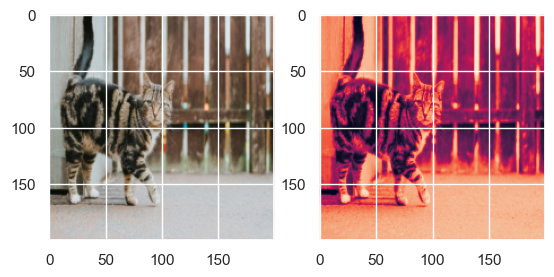

In [99]:
cat1 = io.imread('./input/train/cats/cat_10.jpg')
cat1_ = resize(cat1, (200,200,3))

cat1_gs = rgb2gray(cat1_)
print(cat1_.shape)
fig=plt.figure()
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(cat1_)
fig.add_subplot(rows, columns, 2)
plt.imshow(cat1_gs)

In [121]:
def train_data():
    Images = []
    Label = []
    img_dog = []
    Y_dog = []
    Dogs_data = next(os.walk(Train_Cats))
    print(len(Dogs_data[2]))
    for file in Dogs_data[2]:
        img_x = rgb2gray(resize(cv2.imread(Dogs_data[0] + file),(200,200,3)))
        img_x = np.ravel(img_x)
        img_dog.append(img_x)
        Y_dog.append(0)
    Images.extend(img_dog)
    Label.extend(Y_dog)
    
    img_cat = []
    Y_cat = []
    Cats_data = next(os.walk(Train_Dogs))
    print(len(Cats_data[2]))
    for file in Cats_data[2]:
        img_x = rgb2gray(resize(io.imread(Cats_data[0] + file), (200, 200, 3)))
        img_x = np.ravel(img_x)
        img_cat.append(img_x)
        Y_cat.append(1)
    Images.extend(img_cat)
    Label.extend(Y_cat)
    Images , Label = np.asarray(Images), np.asarray(Label)
    return Images, Label

In [122]:
Images , Label =train_data()
print(Images.shape)
print(Label.shape)
neigh = KNeighborsClassifier(n_neighbors = 8, p = 2, metric = 'euclidean')
neigh.fit(Images,Label)

279
278
(557, 40000)
(557,)


KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [124]:
def test_data():
    Images_test = []
    Label_test = []
    img_dog = []
    Y_dog = []
    Dogs_data = next(os.walk(Test_Cats))
    print(len(Dogs_data[2]))
    for file in Dogs_data[2]:
        img_x = rgb2gray(resize(io.imread(Dogs_data[0] + file),(200,200,3)))
        img_x = np.ravel(img_x)
        img_dog.append(img_x)
        Y_dog.append(0)
    Images_test.extend(img_dog)
    Label_test.extend(Y_dog)
    
    img_cat = []
    Y_cat = []
    Cats_data = next(os.walk(Test_Dogs))
    print(len(Cats_data[2]))
    for file in Cats_data[2]:
        img_x = rgb2gray(resize(io.imread(Cats_data[0] + file), (200, 200, 3)))
        img_x = np.ravel(img_x)
        img_cat.append(img_x)
        Y_cat.append(1)
    Images_test.extend(img_cat)
    Label_test.extend(Y_cat)
    Images_test , Label_test = np.asarray(Images_test), np.asarray(Label_test)
    return Images_test, Label_test


In [128]:
Images_test , Label_test = test_data()
print(Images_test.shape)
print(Label_test.shape)
neigh.score(Images_test,Label_test)

70
70
(140, 40000)
(140,)


0.5214285714285715

In [129]:
y_predict=neigh.predict(Images_test)


In [130]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Label_test, y_predict)
print(cm)

[[39 31]
 [36 34]]


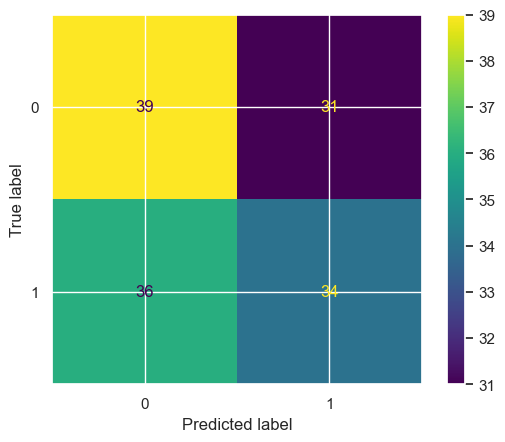

In [132]:
classes = 0,1
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [133]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(Images,Label)
y_pred = clf.predict(Images_test)

In [135]:
y_pred = clf.predict(Images_test)
clf.score(Images_test,Label_test)


0.5714285714285714

In [136]:
cm = confusion_matrix(Label_test,y_pred)
print(cm)

[[38 32]
 [28 42]]


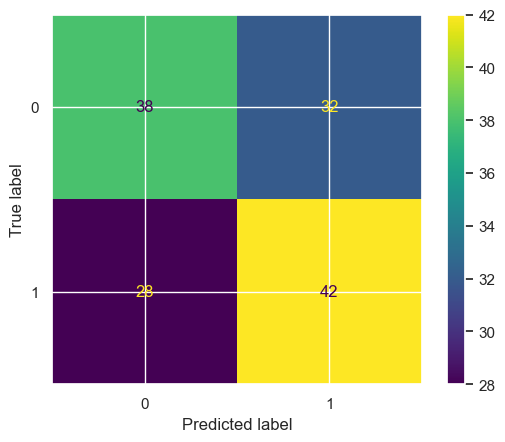

In [137]:
classes = 0,1
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [147]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(random_state=42,activation='logistic',hidden_layer_sizes=(100,100,100))
mlpc.fit(Images,Label)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100, 100),
              random_state=42)

In [148]:
mlpc.score(Images_test,Label_test)


0.4857142857142857

In [149]:
y_pred=mlpc.predict(Images_test)
cm=confusion_matrix(Label_test, y_pred)
print(cm)

[[14 56]
 [16 54]]


In [150]:
from sklearn.model_selection import GridSearchCV
MLPC = MLPClassifier()

# It's time consuming with MLPC with big hidden layer option 
param_grid_MLPC = {
    'hidden_layer_sizes': [(4000,10),
                           (100,)
                          # (4000,)
                          ],
    'activation': ['tanh', 
                  # 'relu'
                  ],
    'solver': ['sgd',
               #'lbfgs'
              ],
    'alpha': [0.05, 
              #1e-5
             ],
    'learning_rate': ['constant',
                     # 'adaptive'
                     ],
}


MLPC_CV = GridSearchCV(estimator=MLPC, param_grid=param_grid_MLPC, verbose=3)
MLPC_CV.fit(Images, Label)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(4000, 10), learning_rate=constant, solver=sgd;, score=0.500 total time=10.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(4000, 10), learning_rate=constant, solver=sgd;, score=0.545 total time=20.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
Traceback (most recent call last):
Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
  File "/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/jl/dvll988j1v75r1v3fzdrcdb00000gn/T/ipykernel_5190/2460358509.py", line 26, in <module>
    MLPC_CV.fit(Images, Label)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.p

KeyboardInterrupt: 

In [151]:
from sklearn.tree import DecisionTreeClassifier
parameter = {
    'criterion' :['entropy','gini','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
model = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model,param_grid = parameter,cv = 5)
cv.fit(Images,Label)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-p

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [152]:
cv.score(Images_test,Label_test)

0.5214285714285715

In [153]:
y_pred=cv.predict(Images_test)
cm=confusion_matrix(Label_test, y_pred)
print(cm)

[[40 30]
 [37 33]]
